In [249]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import os
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split, cross_val_score
from collections import defaultdict
import matplotlib.pyplot as plt

#Australian Open 2014

In [290]:
fname_aus_2014 = os.getcwd() + '/AusOpen-men-2013.csv'
aus_2014 = pd.read_csv(fname_aus_2014)

# aus_2014.drop(labels=['Player1', 'Player2', 'Round'], axis=1, inplace=True)
aus_2014.drop(labels=['Player1', 'Player2'], axis=1, inplace=True)
aus_2014.fillna(0, inplace=True)

In [ ]:
aus_2014['is_train'] = np.random.uniform(0, 1, len(aus_2014)) <= .7
train, validation = aus_2014[aus_2014['is_train']==True], aus_2014[aus_2014['is_train']==False]
y_train = train['Result']
x_train = train.drop(labels=['Result', 'is_train'], axis=1)

y_validation_aus_2014 = validation['Result']
x_validation_aus_2014 = validation.drop(labels=['Result', 'is_train'], axis=1)

#French Open 2014

In [269]:
fname_french_2014 = os.getcwd() + '/FrenchOpen-men-2013.csv'
fre_2014 = pd.read_csv(fname_french_2014)
# fre_2014.drop(labels=['Player1', 'Player2', 'Round'], axis=1, inplace=True)
fre_2014.drop(labels=['Player1', 'Player2'], axis=1, inplace=True)
fre_2014.fillna(0, inplace=True)

In [69]:
y_validation_fre_2014 = fre_2014['Result']
x_validation_fre_2014 = fre_2014.drop(labels=['Result'], axis=1)

#US Open 2014

In [280]:
fname_us_2014 = os.getcwd() + '/USOpen-men-2013.csv'
us_2014 = pd.read_csv(fname_us_2014)
# us_2014.drop(labels=['Player1', 'Player2', 'Round'], axis=1, inplace=True)
us_2014.drop(labels=['Player1', 'Player2'], axis=1, inplace=True)
us_2014.fillna(0, inplace=True)

In [70]:
y_validation_us_2014 = us_2014['Result']
x_validation_us_2014 = us_2014.drop(labels=['Result'], axis=1)

#Wimbledon 2014

In [281]:
fname_wimbledon_2014 = os.getcwd() + '/Wimbledon-men-2013.csv'
wimbledon_2014 = pd.read_csv(fname_wimbledon_2014)
# wimbledon_2014.drop(labels=['Player1', 'Player2', 'Round'], axis=1, inplace=True)
wimbledon_2014.drop(labels=['Player1', 'Player2'], axis=1, inplace=True)
wimbledon_2014.fillna(0, inplace=True)

In [75]:
y_validation_wimbledon_2014 = wimbledon_2014['Result']
x_validation_wimbledon_2014 = wimbledon_2014.drop(labels=['Result'], axis=1)

#Splitting data

In [292]:
tournaments = ['Australian Open', 'French Open', 'Wimbledon', 'US Open']
model_names = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes']
tournament_data = {'Australian Open': aus_2014, 
                   'French Open': fre_2014, 
                   'Wimbledon': wimbledon_2014, 
                   'US Open': us_2014}

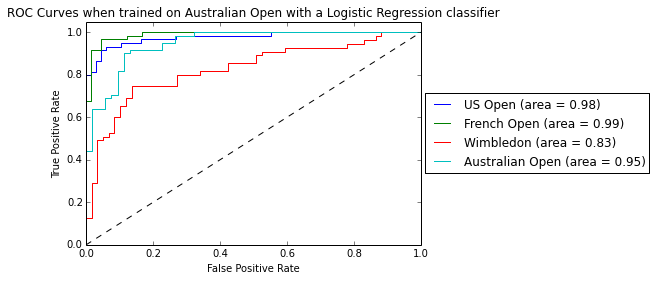

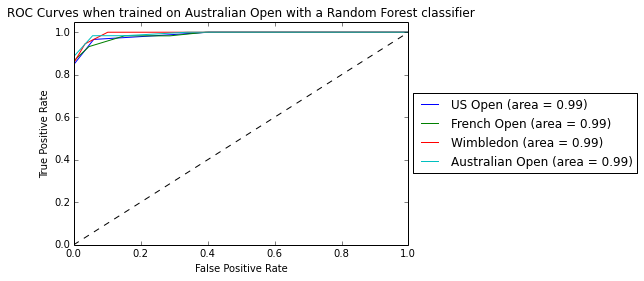

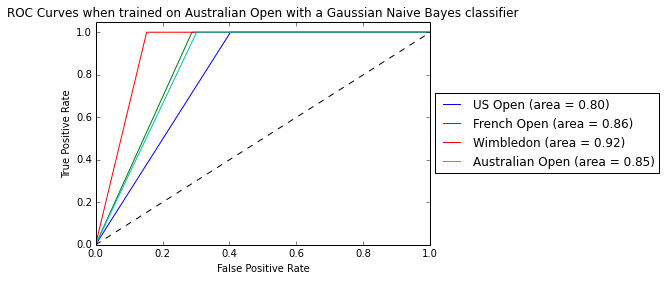

In [264]:
roc_by_model = {}
for model_name in model_names:
    build_model(model_name, tournament_data, tournaments[0], 0.9)

How predictive are the first few rounds of the 2014 Australian Open?

In [313]:
aus_2014

,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,1,0,0,3,61,35,39,18,5,1,...,4,8,8,9,101,6,7,6,0,0
1,1,1,3,0,61,31,39,13,13,1,...,0,0,0,0,42,1,3,1,0,0
2,1,0,0,3,52,53,48,20,8,4,...,4,13,12,16,126,6,7,6,0,0
3,1,1,3,0,53,39,47,24,8,6,...,1,7,0,0,79,2,2,3,0,0
4,1,0,1,3,76,63,24,12,0,4,...,3,5,16,28,127,1,6,7,6,0
5,1,0,1,3,65,51,35,22,9,3,...,4,7,14,17,122,6,6,3,7,0
6,1,0,2,3,68,73,32,24,5,3,...,10,17,25,36,173,3,7,6,6,6
7,1,1,2,0,47,18,53,15,3,4,...,2,6,8,12,61,3,2,0,0,0
8,1,0,0,3,64,26,36,12,3,0,...,7,10,8,11,94,7,6,6,0,0
9,1,1,3,2,77,76,23,11,6,4,...,6,14,0,0,141,6,3,6,3,4


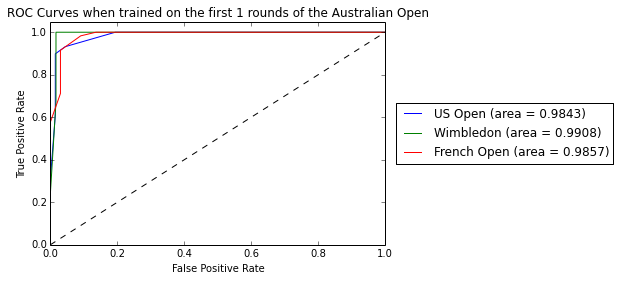

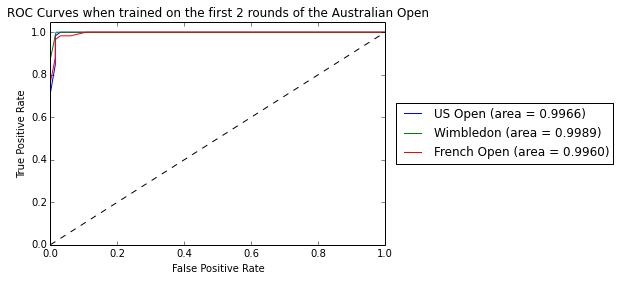

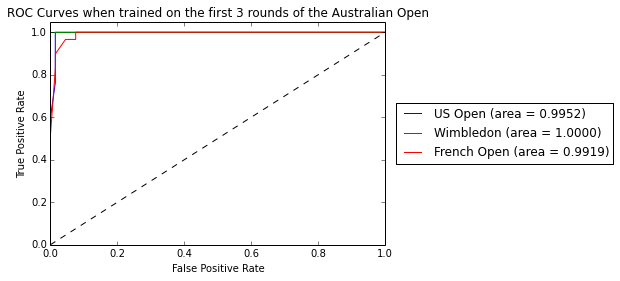

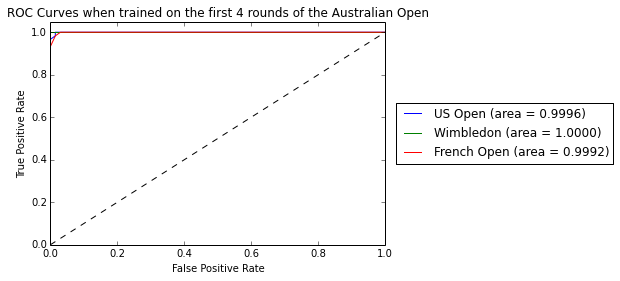

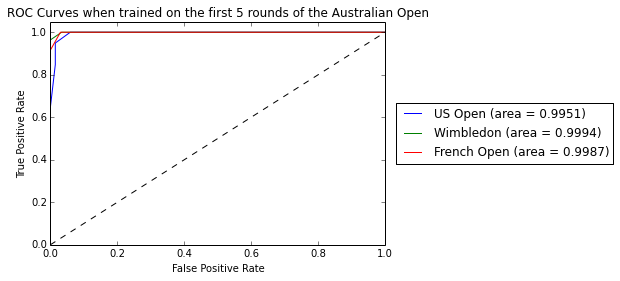

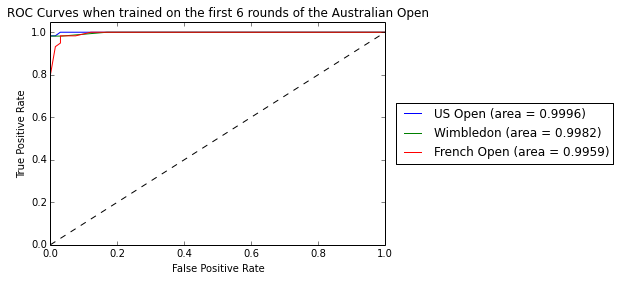

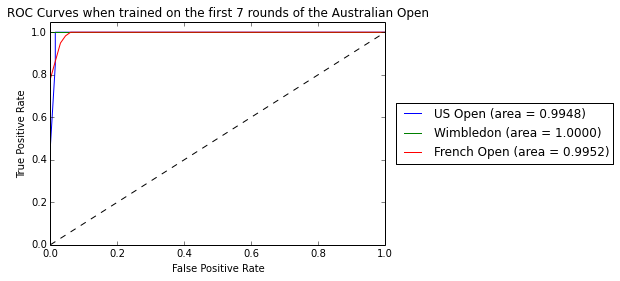

In [312]:
# for tournament in tournaments:
#     for N in range(1, tournament_data[tournament]['Round'].max()+1):
#         build_model_rounds(tournament_data, tournament, N)

for N in range(1, tournament_data[tournaments[0]]['Round'].max()+1):
    build_model_rounds(tournament_data, tournaments[0], N)

In [307]:
def build_model_rounds(tournament_data, train_on, max_rounds):
    
    training = tournament_data[train_on]
    training_firstNrounds = aus_2014[aus_2014['Round'] <= max_rounds]
    X_train = training_firstNrounds.drop(labels=['Result', 'Round'], axis=1)
    y_train = training_firstNrounds['Result']
   
    tennis_model = RandomForestClassifier().fit(X_train, y_train)
    
    x_validation = {}
    y_validation = {}
    
    other_tournaments = [t for t in tournament_data.keys() if t != train_on] 
    for other_tournament in other_tournaments:
        x_validation[other_tournament] = tournament_data[other_tournament].drop(labels=['Result', 'Round'], axis=1)
        y_validation[other_tournament] = tournament_data[other_tournament]['Result']
        
    roc_auc = {}
    fpr = {}
    tpr = {}

    plt.figure()
    for i in x_validation.keys():
        disbursed = tennis_model.predict_proba(x_validation[i])
        fpr[i], tpr[i], _ = roc_curve(y_validation[i], disbursed[:, 1])
        roc_auc[i] = round(auc(fpr[i], tpr[i]), 4)
        plt.plot(fpr[i], tpr[i], label='{0} (area = {1:0.4f})'''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves when trained on the first {0} rounds of the {1}'''.format(max_rounds, train_on))
    plt.legend(loc="center right", bbox_to_anchor = (1.7, 0.5))
    plt.show()
    return plt

In [306]:
def build_model(model_name, tournament_data, train_on, test_set_size):   
    models = {'Random Forest': RandomForestClassifier(), 
              'Logistic Regression': LogisticRegression(), 
              'Gaussian Naive Bayes': GaussianNB()}
    tournaments = ['Australian Open', 'French Open', 'Wimbledon', 'US Open']
    
    X = tournament_data[train_on].drop(labels='Result', axis=1)
    y = tournament_data[train_on]['Result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=int(time.time()))
    
    tennis_model = models[model_name].fit(X_train, y_train)
    
    x_validation = {train_on: X_test}
    y_validation = {train_on: y_test}
    
    other_tournaments = [t for t in tournaments if t != train_on]
    
    for other_tournament in other_tournaments:
        x_validation[other_tournament] = tournament_data[other_tournament].drop(labels='Result', axis=1)
        y_validation[other_tournament] = tournament_data[other_tournament]['Result']
        
    roc_auc = {}
    fpr = {}
    tpr = {}

    plt.figure()
    for i in x_validation.keys():
        disbursed = tennis_model.predict_proba(x_validation[i])
        fpr[i], tpr[i], _ = roc_curve(y_validation[i], disbursed[:, 1])
        roc_auc[i] = round(auc(fpr[i], tpr[i]), 4)
        plt.plot(fpr[i], tpr[i], label='{0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves when trained on {0} with a {1} classifier'''.format(train_on, model_name))
    plt.legend(loc="center right", bbox_to_anchor = (1.7, 0.5))
    plt.show()
    return plt
#     return roc_auc

#Random Forest Model

In [104]:
x_validation_sets = {'Australian Open': aus_2014, 
                     'French Open': x_validation_fre_2014, 
                     'Wimbledon': x_validation_wimbledon_2014, 
                     'US Open': x_validation_us_2014}
y_validation_sets = {'Australian Open': y_validation_aus_2014,
                     'French Open': y_validation_fre_2014,
                     'Wimbledon': y_validation_wimbledon_2014, 
                     'US Open': y_validation_us_2014}

In [256]:
rf = RandomForestClassifier()
# tennis_rf = rf.fit(x_train, y_train)
roc_auc_rf = {}
cross_val_score(tennis_rf, x_train, y_train, scoring='accuracy', )
# disbursed = tennis_rf.predict_proba(x_validation)
# fpr, tpr, _ = roc_curve(y_validation, disbursed[:, 1])
# roc_auc_rf = round(auc(fpr, tpr), 4)

# pred_vs_actual = pd.DataFrame()
# pred_vs_actual['pred'] = predicted_class
# pred_vs_actual['actual'] = y_validation.tolist()
# pred_vs_actual['diff'] = abs(pred_vs_actual['pred'] - pred_vs_actual['actual'])

# tol = 1e-4
# predicted_class = []
# for i in range(0, len(disbursed)):
#     diff = disbursed[i, 0] - disbursed[i, 1]
#     if diff <tol:
#         predicted_class.append(1)
#     else:
#         predicted_class.append(0)

# pred_vs_actual

array([ 1.        ,  0.96428571,  1.        ])

#Logistic Regression Model

In [102]:
lg = LogisticRegression()
tennis_lg = lg.fit(x_train, y=y_train)

roc_auc_lg = {}

for i in range(len(x_validation_sets)):
    disbursed = tennis_lg.predict_proba(x_validation_sets[i])
    fpr, tpr, _ = roc_curve(y_validation_sets[i], disbursed[:, 1])
    roc_auc_lg[tournaments[i]] = round(auc(fpr, tpr), 4)

# fpr, tpr, _ = roc_curve(y_validation, disbursed[:, 1])
# roc_auc_lg = auc(fpr, tpr)
print roc_auc_lg

{'Australian Open 2014': 0.9091, 'French Open 2014': 0.9751, 'Wimbledon 2014': 0.886, 'US Open 2014': 0.956}


#Naive Bayes Model

In [103]:
gnb = GaussianNB()
tennis_gnb = gnb.fit(x_train, y_train)
roc_auc_gnb = {}

for i in range(len(x_validation_sets)):
    disbursed = tennis_gnb.predict_proba(x_validation_sets[i])
    fpr, tpr, _ = roc_curve(y_validation_sets[i], disbursed[:, 1])
    roc_auc_gnb[tournaments[i]] = round(auc(fpr, tpr), 4)

print roc_auc_gnb

{'Australian Open 2014': 0.9773, 'French Open 2014': 0.9922, 'Wimbledon 2014': 0.9831, 'US Open 2014': 1.0}


In [64]:
fpr, tpr, _ = roc_curve(y_validation, disbursed[:, 1])
roc_auc_nb = auc(fpr, tpr)
print roc_auc_nb

0.999743194658


#ATP 2013

In [10]:
fname_atp_2013 = os.getcwd() + '/atp_matches_2013.csv'
atp_2013 = pd.read_csv(fname_atp_2013)
atp_2013.fillna(-1, inplace=True)
atp_2013.tourney_date = atp_2013.tourney_date.astype(str)
atp_2013.tourney_date = pd.to_datetime(atp_2013.tourney_date, format='%Y%m%d')
atp_2013.sort(columns='tourney_date', axis=0, inplace=True)
atp_2013.set_index(keys='match_num', inplace=True)
atp_2013['plvp2'] = np.random.uniform(0, 1, len(atp_2013)) <= .5
atp_2013['p1_name'], atp_2013['p2_name'] = atp_2013[atp_2013['is_train']==True], aus_2013[aus_2013['is_train']==False]

def f(a):
    val = True if random.random() > 0.5 else False
    if val is True:
        return a['winner_name'], a['loser_name']
    else:
        return a['loser_name'], a['winner_name']
atp_2013['player1'], atp_2013['player2'] = atp_2013[['winner_name', 'loser_name']].apply(f)
a = atp_2013[['winner_name', 'loser_name']]